# **Library Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# **Data Exploration**

In [2]:
# Load the training and test datasets
train = pd.read_csv('/content/drive/MyDrive/covid-19-mrnavaccinedegradation/train.csv')
test = pd.read_csv('/content/drive/MyDrive/covid-19-mrnavaccinedegradation/test.csv')
test_id=test['id_seqpos']

In [3]:
train.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,...,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type
0,id_159f0ff46,id_159f0ff46_44,A,.,H,1.7786,0.1195,0.7346,0.0790,0.3680,...,(,),S,S,C,A,.,),I,S
1,id_d73546f4e,id_d73546f4e_38,G,.,I,0.4397,0.1033,0.1630,0.0799,0.0878,...,(,.,S,H,C,C,.,.,B,H
2,id_f3037fedf,id_f3037fedf_34,G,(,S,0.1120,0.1375,0.0000,0.0744,0.1835,...,(,(,S,S,A,G,(,(,S,S
3,id_468300749,id_468300749_12,G,(,S,0.0622,0.0471,0.1179,0.1075,0.0657,...,.,(,E,S,A,U,.,(,E,S
4,id_69e3878a2,id_69e3878a2_28,U,(,S,0.1378,0.1352,0.4069,0.2168,0.3375,...,(,(,S,S,G,G,(,.,S,H


In [4]:
test.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity_error,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_error_Mg_50C,...,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type
0,id_001f94081,id_001f94081_0,G,.,E,0.1359,0.2613,2.3375,0.2631,0.1501,...,-1,.,-1,E,-1,A,-1,(,-1,S
1,id_001f94081,id_001f94081_4,A,.,E,0.1314,0.1798,0.2635,0.1000,0.1369,...,.,(,E,S,-1,C,-1,(,-1,S
2,id_001f94081,id_001f94081_8,U,(,S,0.0756,0.1056,0.0530,0.0517,0.0705,...,.,.,E,H,A,U,.,.,E,H
3,id_001f94081,id_001f94081_9,C,(,S,0.1087,0.1896,0.5348,0.1474,0.1588,...,(,.,S,H,A,A,.,.,E,H
4,id_001f94081,id_001f94081_13,U,.,H,0.1388,0.1810,0.7699,0.1417,0.1382,...,(,.,S,H,U,G,(,),S,S


In [5]:
print(train.shape)
print(test.shape)

(130560, 45)
(32640, 42)


In [6]:
# # Display basic information about the loaded data
# print("Training Data Info:")
# print(train.info())
# print("\nTest Data Info:")
# print(test.info())

In [7]:
train.describe()

,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C
count,130560.000000,130560.000000,130560.00000,130560.000000,130560.000000,130560.000000,130560.000000,130560.000000,130560.000000,130560.000000
mean,0.376570,2825.710861,0.44650,2332.806124,0.448538,6288.673592,0.405686,3579.976118,0.427428,5969.595514
std,0.730013,19105.915817,0.70582,14614.719469,1.300353,42323.269166,0.840844,23229.704416,1.126904,38182.352844
min,-20.664800,0.001900,-14.74050,0.006100,-44.515300,0.008300,-24.252500,0.004100,-38.339900,0.006500
25%,0.043800,0.044900,0.13130,0.057200,0.099900,0.073900,0.074100,0.052000,0.092700,0.081300
50%,0.216200,0.083000,0.28990,0.098800,0.276100,0.120500,0.256800,0.088800,0.308800,0.133700
75%,0.540400,0.172500,0.56760,0.200000,0.569100,0.244200,0.560000,0.181600,0.613825,0.265325
max,20.667500,146151.225000,14.74010,104235.174200,44.521200,314833.569500,24.252500,171525.321700,38.343800,271158.604000


In [8]:
test.describe()

,reactivity_error,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_50C,deg_error_50C
count,32640.000000,32640.000000,32640.000000,32640.000000,32640.000000,32640.000000,32640.000000
mean,2867.711465,2332.851217,0.440402,6308.833647,3591.413087,0.419736,6035.790535
std,19219.425971,14677.383270,1.225579,42379.018394,23269.401175,1.103974,38260.803049
min,0.003400,0.009200,-44.515300,0.009400,0.005700,-38.339900,0.008500
25%,0.044800,0.057100,0.098100,0.073700,0.051900,0.090400,0.081700
50%,0.083100,0.099400,0.271600,0.120800,0.089500,0.303900,0.134200
75%,0.174800,0.204600,0.565600,0.248600,0.186425,0.611100,0.267300
max,146151.225000,104235.174200,44.519700,314833.569500,171525.321700,38.339900,271158.604000


In [9]:
id_unique=train['id'].unique()
print(len(id_unique))

2400


# **Visualization**

## Position

In [10]:
train.rename(columns={'id_seqpos': 'pos'}, inplace=True)
train['pos'] = train['pos'].apply(lambda x: int(x.split('_')[-1]))

test.rename(columns={'id_seqpos': 'pos'}, inplace=True)
test['pos'] = test['pos'].apply(lambda x: int(x.split('_')[-1]))

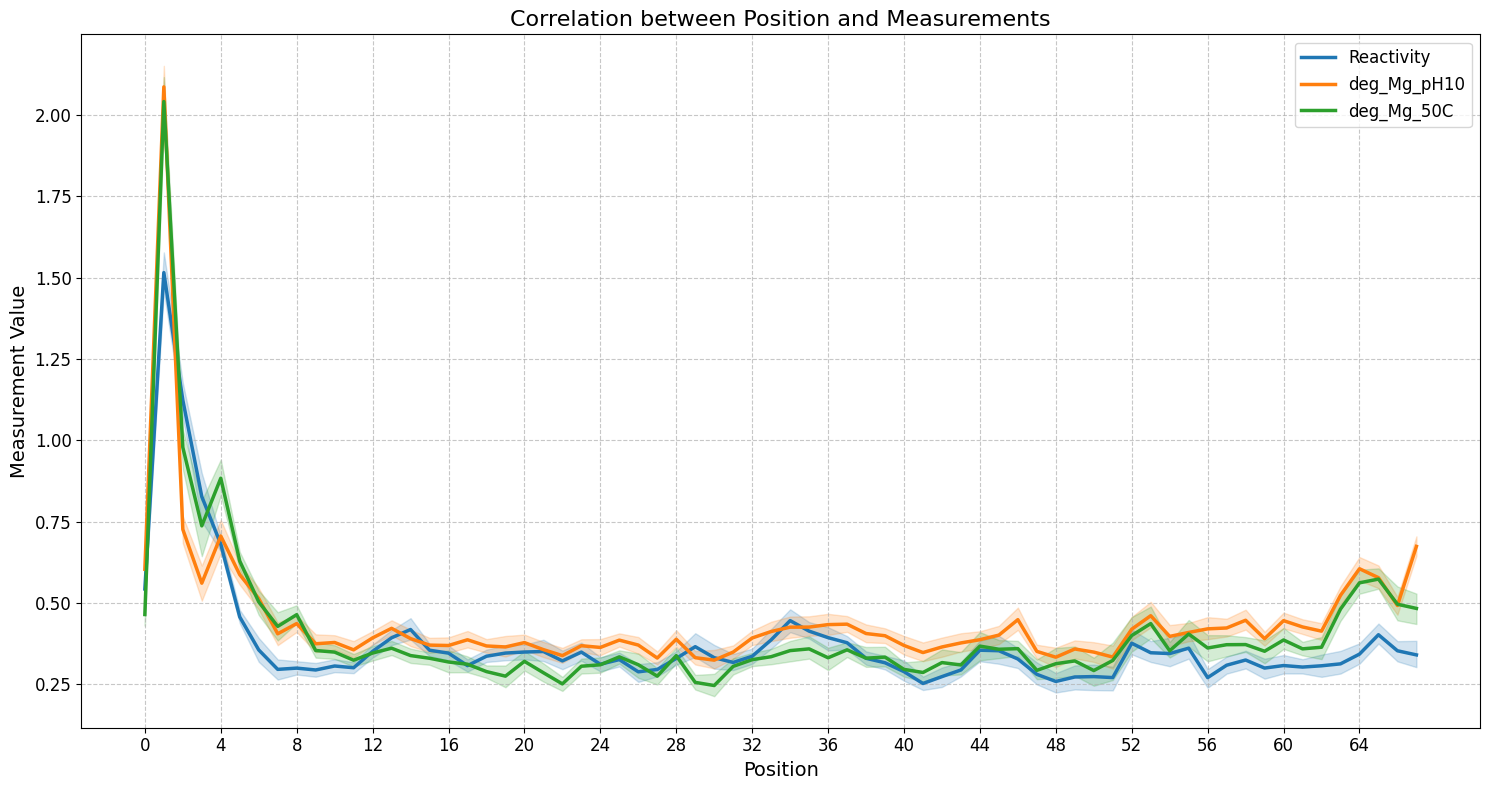

In [11]:
plt.figure(figsize=(15, 8))
sns.set_palette("tab10")  # Set color palette

# Create line plots for each measurement with enhanced styling
sns.lineplot(data=train, x='pos', y='reactivity', label='Reactivity', linewidth=2.5)
sns.lineplot(data=train, x='pos', y='deg_Mg_pH10', label='deg_Mg_pH10', linewidth=2.5)
sns.lineplot(data=train, x='pos', y='deg_Mg_50C', label='deg_Mg_50C', linewidth=2.5)

plt.title('Correlation between Position and Measurements', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Measurement Value', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(range(0, 68, 4),fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


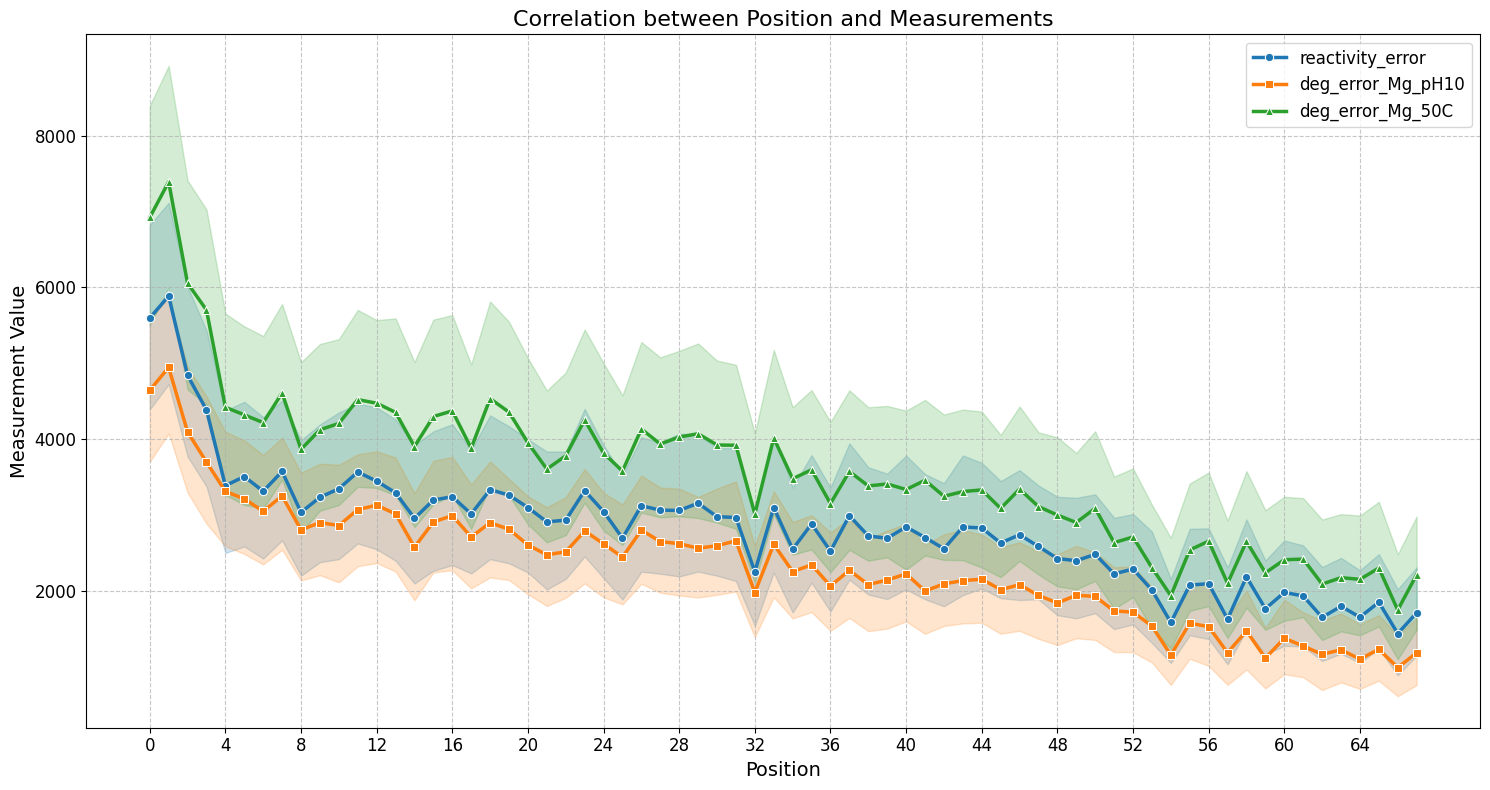

In [12]:
plt.figure(figsize=(15, 8))
sns.set_palette("tab10")  # Set color palette

# Create line plots for each measurement with enhanced styling
sns.lineplot(data=train, x='pos', y='reactivity_error', label='reactivity_error', linewidth=2.5, marker='o')
sns.lineplot(data=train, x='pos', y='deg_error_Mg_pH10', label='deg_error_Mg_pH10', linewidth=2.5, marker='s')
sns.lineplot(data=train, x='pos', y='deg_error_Mg_50C', label='deg_error_Mg_50C', linewidth=2.5, marker='^')

plt.title('Correlation between Position and Measurements', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Measurement Value', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(range(0, 68, 4),fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

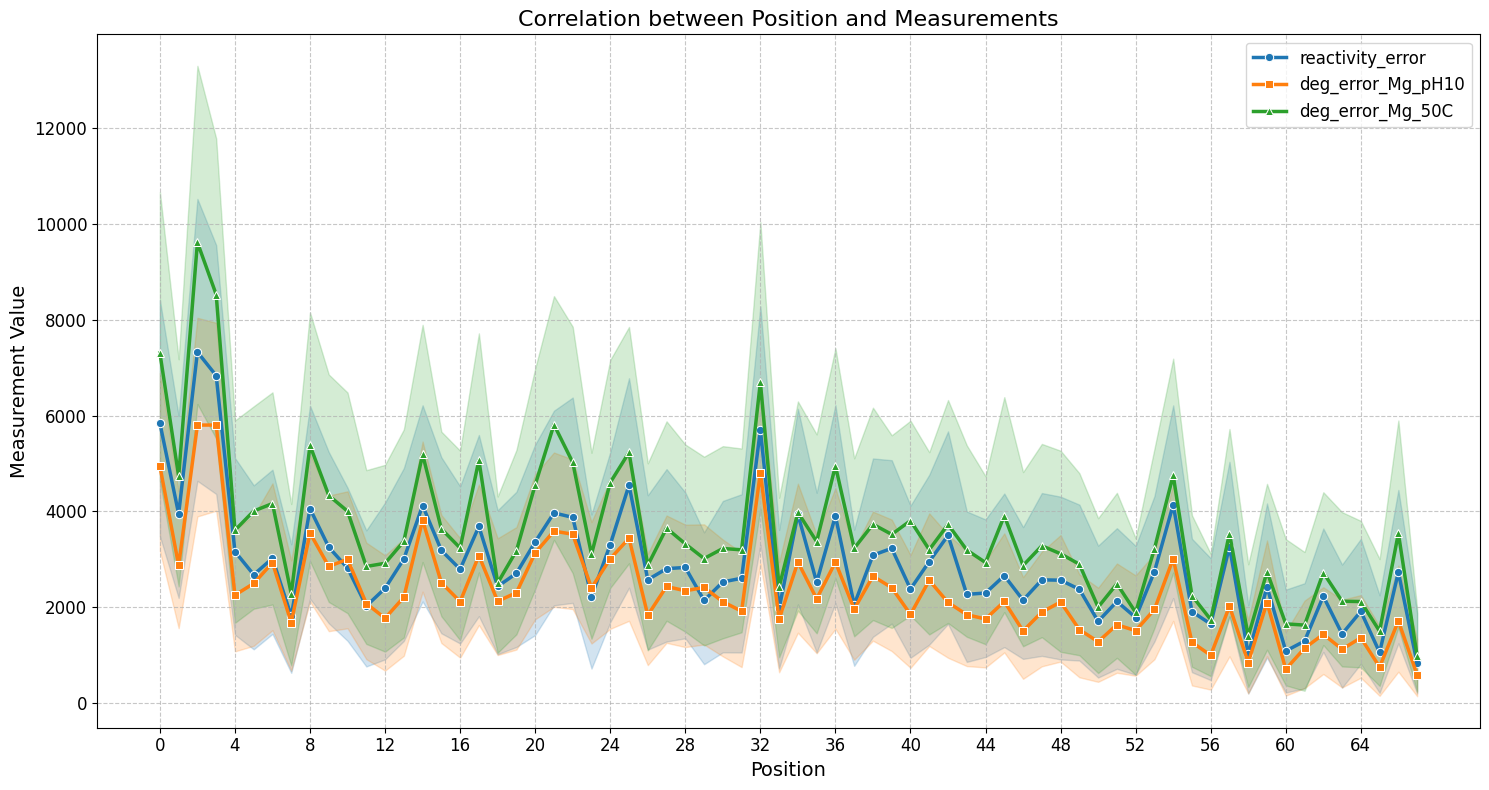

In [13]:
plt.figure(figsize=(15, 8))
sns.set_palette("tab10")  # Set color palette

# Create line plots for each measurement with enhanced styling
sns.lineplot(data=test, x='pos', y='reactivity_error', label='reactivity_error', linewidth=2.5, marker='o')
sns.lineplot(data=test, x='pos', y='deg_error_Mg_pH10', label='deg_error_Mg_pH10', linewidth=2.5, marker='s')
sns.lineplot(data=test, x='pos', y='deg_error_Mg_50C', label='deg_error_Mg_50C', linewidth=2.5, marker='^')

plt.title('Correlation between Position and Measurements', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Measurement Value', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(range(0, 68, 4),fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observation:

The initial 5 bases exhibit a notably high susceptibility to errors and rapid degradation. It's likely that, at this stage, the structural loops haven't even begun to form. This could potentially account for the significant instability observed. However, assessing these bases proves to be challenging, as evident from the error graphs. One approach could involve treating the first 5 bases as a single unit and generating embeddings accordingly. Alternatively, it might be worth considering a distinct model exclusively for handling these 5 bases. Predicting the remainder appears comparably more manageable.

## Sequence

In [14]:
nucleotide_counts_train = train['sequence'].value_counts()
print(nucleotide_counts_train)

nucleotide_counts_test = test['sequence'].value_counts()
print(nucleotide_counts_test)

A    47922
G    34975
C    24678
U    22985
Name: sequence, dtype: int64
A    11773
G     8877
C     6230
U     5760
Name: sequence, dtype: int64


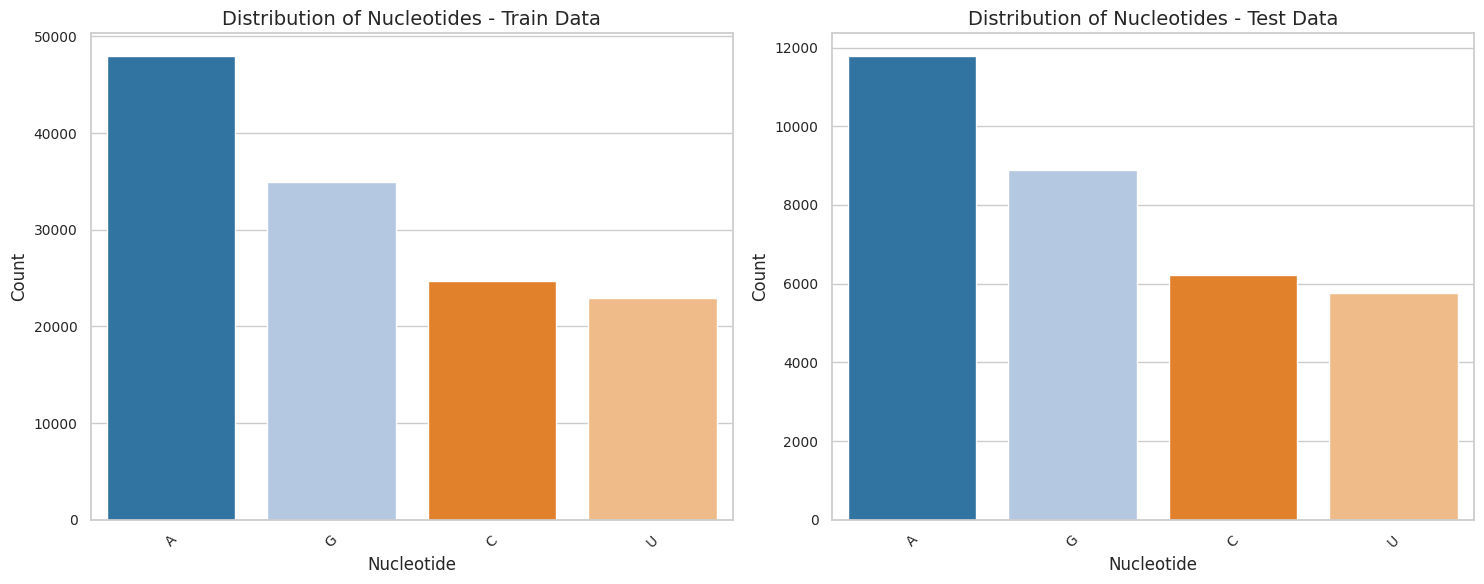

In [15]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the distribution of nucleotides for train_df
sns.barplot(ax=axes[0], x=nucleotide_counts_train.index, y=nucleotide_counts_train.values, palette="tab20")
axes[0].set_title('Distribution of Nucleotides - Train Data', fontsize=14)
axes[0].set_xlabel('Nucleotide', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

# Plot the distribution of nucleotides for test_df
sns.barplot(ax=axes[1], x=nucleotide_counts_test.index, y=nucleotide_counts_test.values, palette="tab20")
axes[1].set_title('Distribution of Nucleotides - Test Data', fontsize=14)
axes[1].set_xlabel('Nucleotide', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

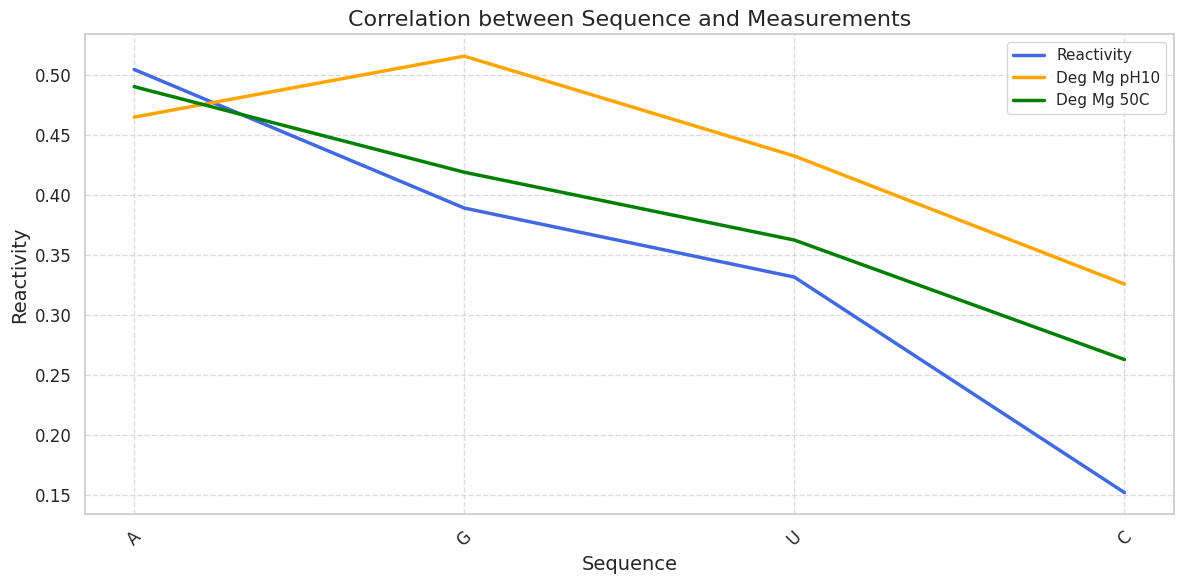

In [16]:
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='sequence', y='reactivity', errorbar=None, linewidth=2.5, color='royalblue', label='Reactivity')
sns.lineplot(data=train, x='sequence', y='deg_Mg_pH10', errorbar=None, linewidth=2.5, color='orange', label='Deg Mg pH10')
sns.lineplot(data=train, x='sequence', y='deg_Mg_50C', errorbar=None, linewidth=2.5, color='green', label='Deg Mg 50C')

plt.title('Correlation between Sequence and Measurements', fontsize=16)
plt.xlabel('Sequence', fontsize=14)
plt.ylabel('Reactivity', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-17-84cfd7eb1b54>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(top_average_train_sequence_pos_pairs))


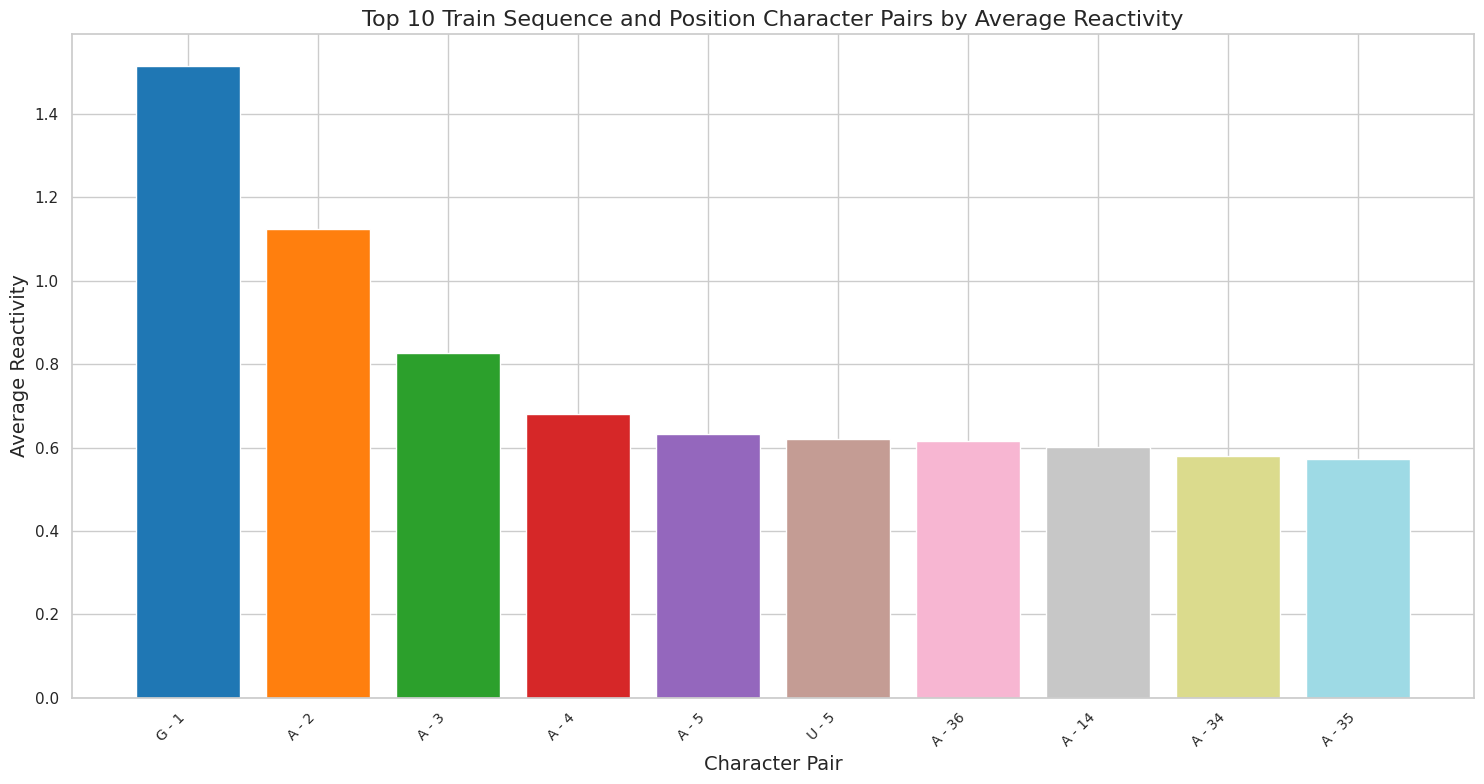

In [17]:
def get_paired_tokens(sequences, positions, reactivities):
    output = {}
    for seq_chars, pos, reactivity in zip(sequences, positions, reactivities):
        for i in range(len(seq_chars)):
            new_token = f'{seq_chars[i]} - {pos}'  # Combine sequence character and position
            if new_token in output:
                output[new_token].append(reactivity)
            else:
                output[new_token] = [reactivity]

    return output

train_sequence_pos_pairs = get_paired_tokens(train.sequence, train.pos, train.reactivity)
average_train_sequence_pos_pairs = {pair: np.mean(reactivities) for pair, reactivities in train_sequence_pos_pairs.items()}
top_average_train_sequence_pos_pairs = dict(sorted(average_train_sequence_pos_pairs.items(), key=lambda item: item[1], reverse=True)[:10])

plt.figure(figsize=(15, 8))

# Customize color palette
color_palette = plt.cm.get_cmap('tab20', len(top_average_train_sequence_pos_pairs))

# Create a bar plot for train dataset
plt.bar(top_average_train_sequence_pos_pairs.keys(), top_average_train_sequence_pos_pairs.values(), color=color_palette(range(len(top_average_train_sequence_pos_pairs))))
plt.title('Top 10 Train Sequence and Position Character Pairs by Average Reactivity', fontsize=16)
plt.xlabel('Character Pair', fontsize=14)
plt.ylabel('Average Reactivity', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Observation:


1.   The 'A' nucleotide displays increased reactivity and a greater tendency for degradation. Following this, the G and U nucleotides exhibit similar behavior.

2.   For the 'C' nucleotide: its strength is notably higher, and it seems to be less prone to degradation compared to the others. Specifically, the differences observed could be approximately twice as significant.

## Structure

In [18]:
structure_counts_train = train['structure'].value_counts()
print(structure_counts_train)

structure_counts_test = test['structure'].value_counts()
print(nucleotide_counts_test)

.    66648
(    31956
)    31956
Name: structure, dtype: int64
A    11773
G     8877
C     6230
U     5760
Name: sequence, dtype: int64


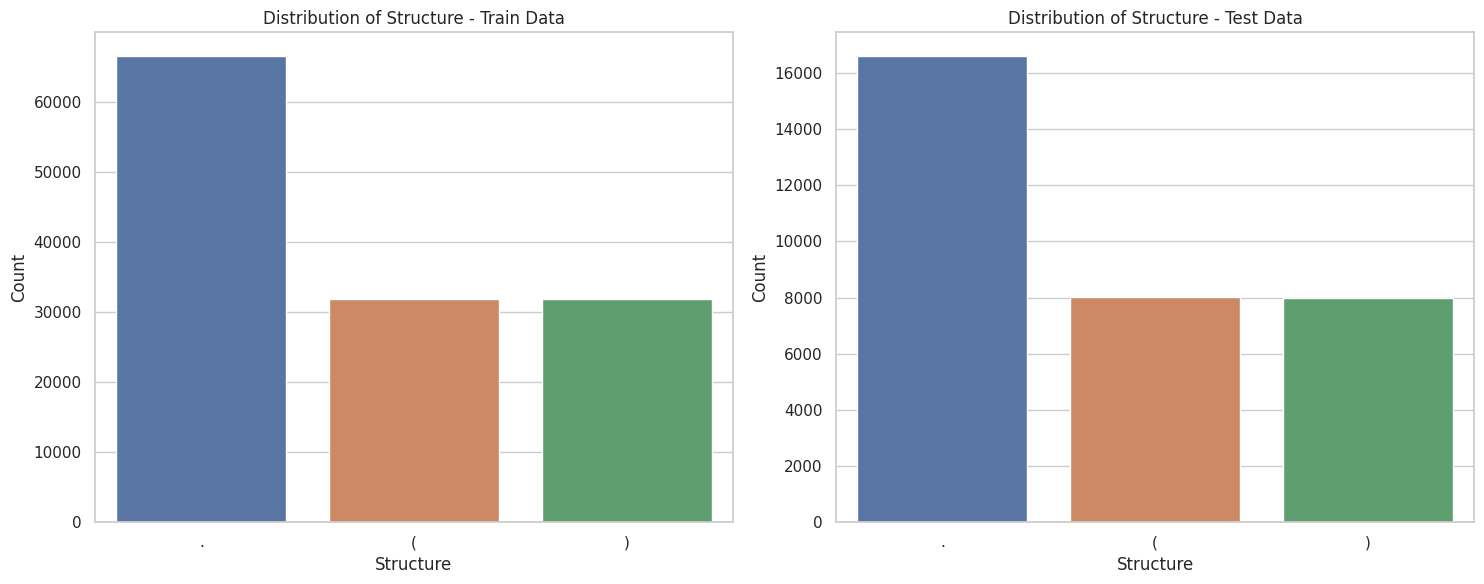

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the distribution of 'structure' for train_df
sns.barplot(ax=axes[0], x=structure_counts_train.index, y=structure_counts_train.values)
axes[0].set_title('Distribution of Structure - Train Data')
axes[0].set_xlabel('Structure')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Plot the distribution of 'structure' for test_df
sns.barplot(ax=axes[1], x=structure_counts_test.index, y=structure_counts_test.values)
axes[1].set_title('Distribution of Structure - Test Data')
axes[1].set_xlabel('Structure')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<Figure size 1800x800 with 0 Axes>

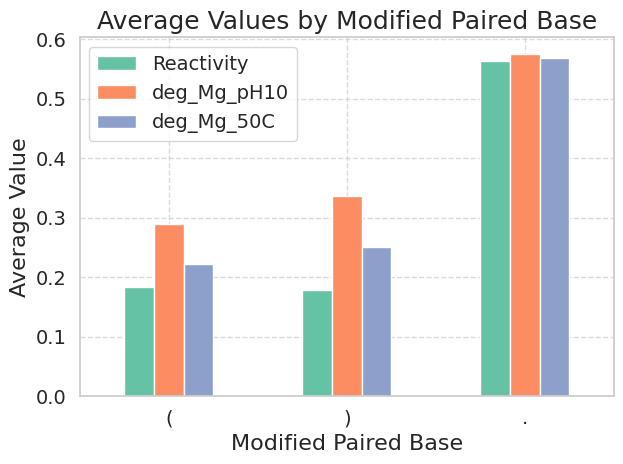

In [20]:
# Calculate average reactivity and degradation values for each modified 'paired'
paired_averages = train.groupby('structure')[['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']].mean()

# Set the style
sns.set(style="whitegrid")

# Create a larger figure
plt.figure(figsize=(18, 8))

# Create a bar plot for all three values with enhanced styling
ax = paired_averages.plot(kind='bar', color=sns.color_palette("Set2"))
plt.title('Average Values by Modified Paired Base', fontsize=18)
plt.xlabel('Modified Paired Base', fontsize=16)
plt.ylabel('Average Value', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

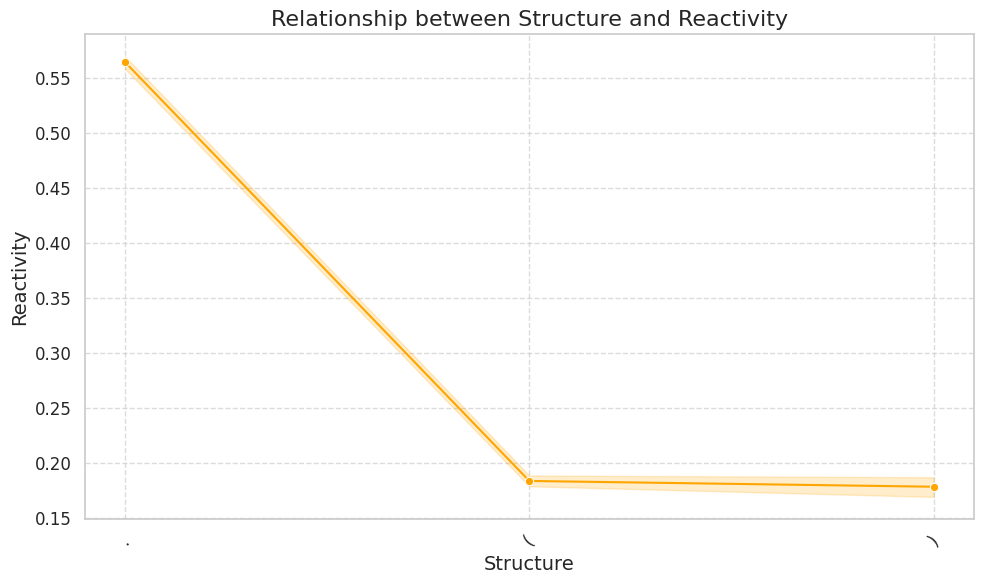

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=train, x='structure', y='reactivity', marker='o', dashes=False, color='orange')
plt.title('Relationship between Structure and Reactivity', fontsize=16)
plt.xlabel('Structure', fontsize=14)
plt.ylabel('Reactivity', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Relationship between structure and sequence


<ipython-input-22-8964ba9eeae2>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(train_sequence_structure_pairs))


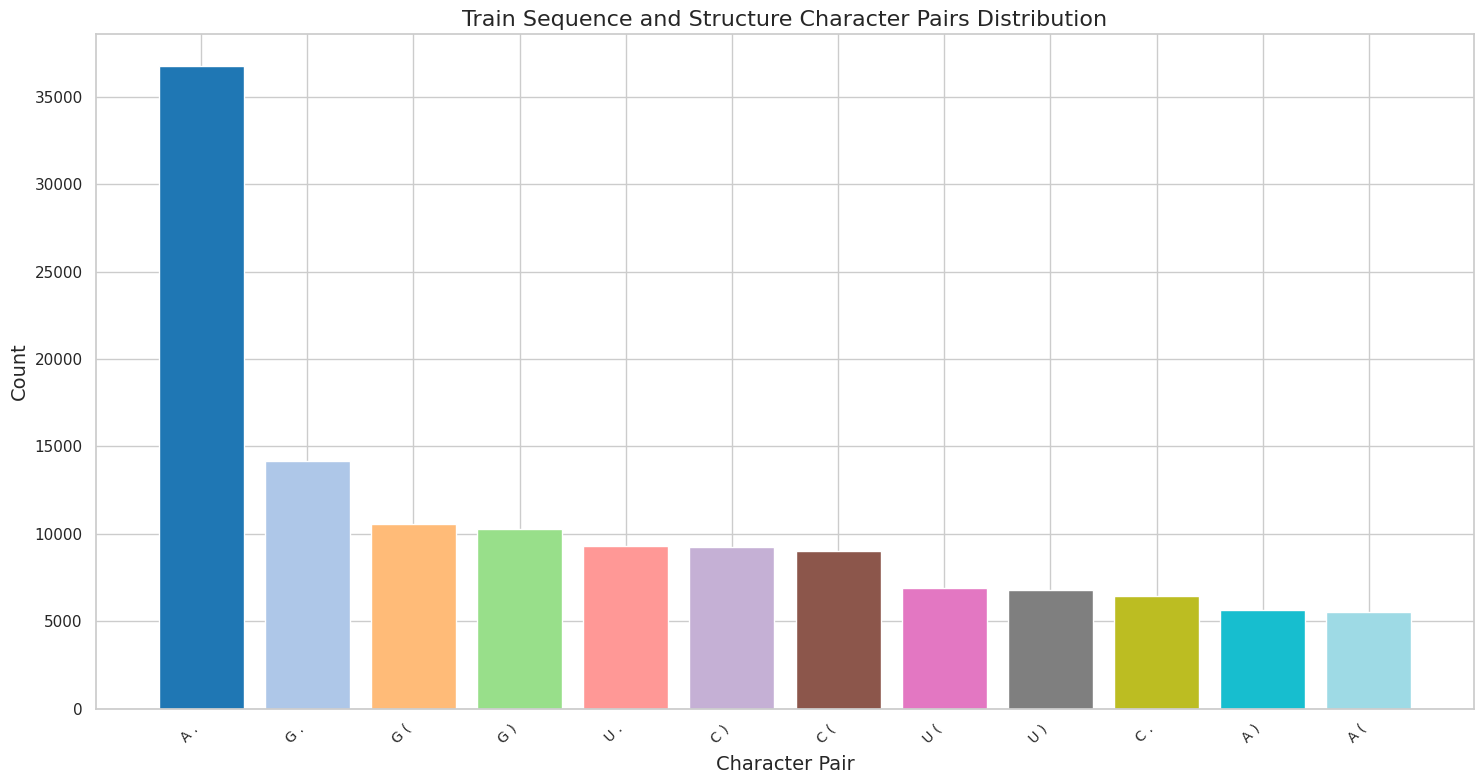

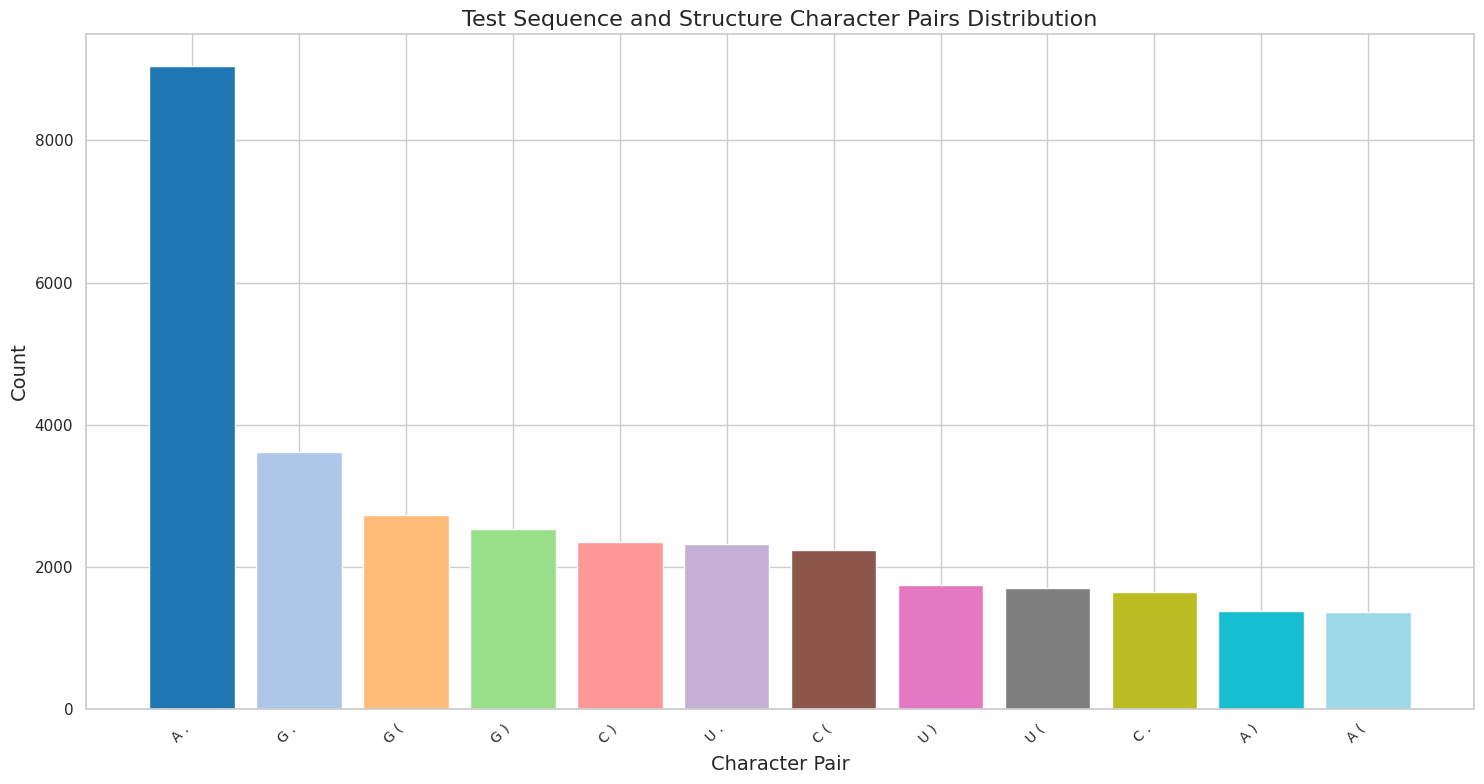

In [22]:
def get_paired_tokens(*sequences):
    output = Counter()
    for seq_chars in zip(*sequences):
        for i in range(len(seq_chars[0])):
            new_token = ''
            for seq_char in seq_chars:
                new_token += ' ' + seq_char[i]
            output += Counter([new_token])

    return output

train_sequence_structure_pairs = get_paired_tokens(train.sequence, train.structure)
test_sequence_structure_pairs = get_paired_tokens(test.sequence, test.structure)

train_sequence_structure_pairs = dict(train_sequence_structure_pairs.most_common(1000))
test_sequence_structure_pairs = dict(test_sequence_structure_pairs.most_common(1000))

plt.figure(figsize=(15, 8))

# Customize color palette
color_palette = plt.cm.get_cmap('tab20', len(train_sequence_structure_pairs))

# Create a bar plot for train dataset
plt.bar(train_sequence_structure_pairs.keys(), train_sequence_structure_pairs.values(), color=color_palette(range(len(train_sequence_structure_pairs))))
plt.title('Train Sequence and Structure Character Pairs Distribution', fontsize=16)
plt.xlabel('Character Pair', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))

# Create a bar plot for test dataset
plt.bar(test_sequence_structure_pairs.keys(), test_sequence_structure_pairs.values(), color=color_palette(range(len(test_sequence_structure_pairs))))
plt.title('Test Sequence and Structure Character Pairs Distribution', fontsize=16)
plt.xlabel('Character Pair', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

<ipython-input-23-43320ce688bc>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(train_sequence_structure_pairs))


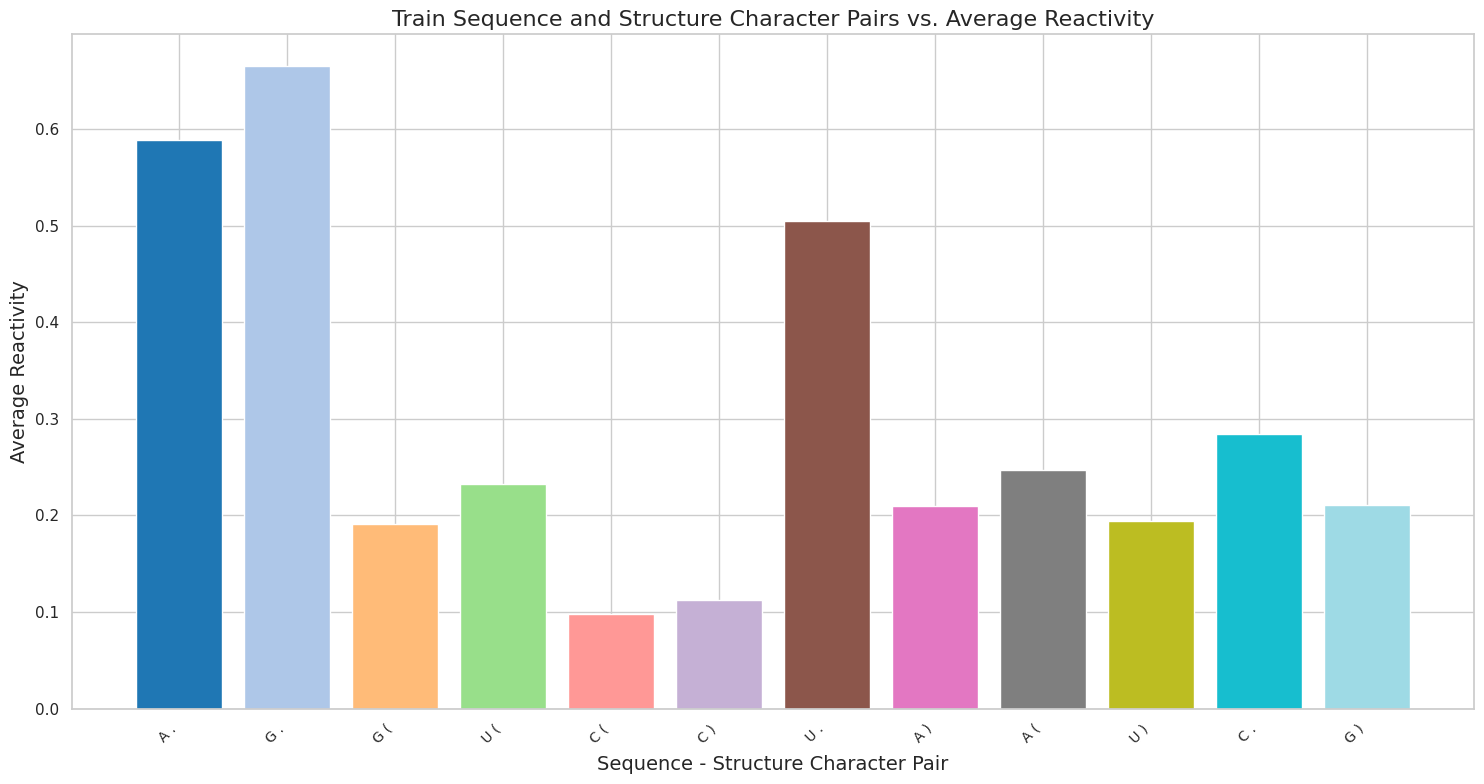

In [23]:
def get_paired_reactivity(*sequences, reactivity_values):
    output = Counter()
    for seq_chars, reactivity in zip(zip(*sequences), reactivity_values):
        new_token = ''
        for seq_char in seq_chars:
            new_token += ' ' + seq_char
        output[new_token] += reactivity

    return output

train_sequence_structure_pairs = get_paired_tokens(train.sequence, train.structure)
train_sequence_structure_reactivity = get_paired_reactivity(train.sequence, train.structure, reactivity_values=train.reactivity)

plt.figure(figsize=(15, 8))

# Customize color palette
color_palette = plt.cm.get_cmap('tab20', len(train_sequence_structure_pairs))

# Create a bar plot for train dataset
plt.bar(train_sequence_structure_pairs.keys(), [train_sequence_structure_reactivity[pair] / train_sequence_structure_pairs[pair] for pair in train_sequence_structure_pairs], color=color_palette(range(len(train_sequence_structure_pairs))))
plt.title('Train Sequence and Structure Character Pairs vs. Average Reactivity', fontsize=16)
plt.xlabel('Sequence - Structure Character Pair', fontsize=14)
plt.ylabel('Average Reactivity', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

## Predicted loop type

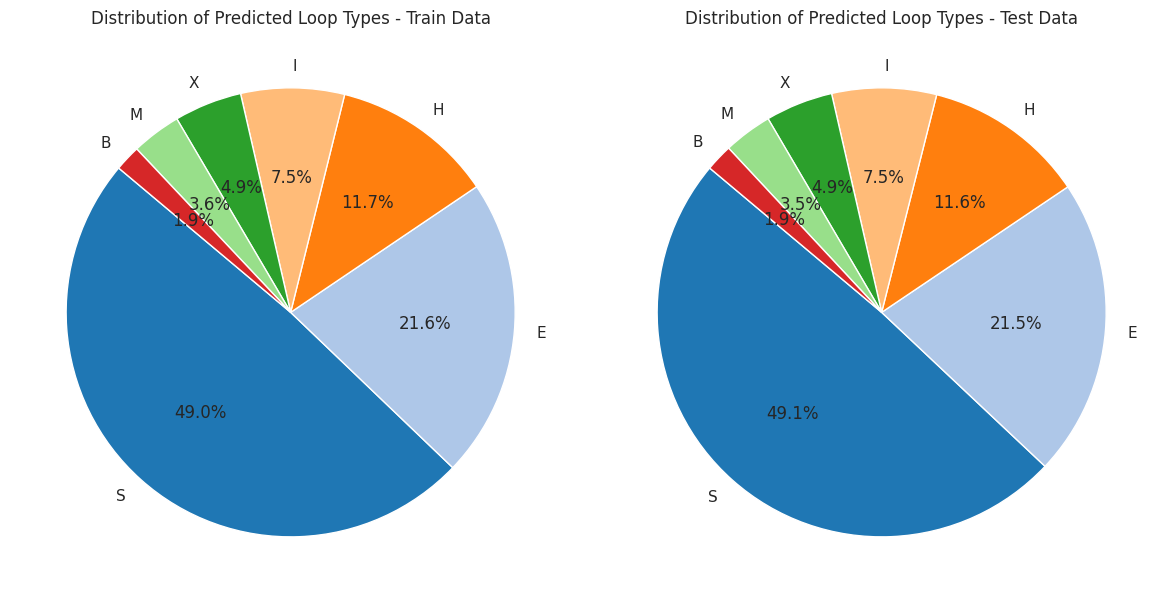

In [24]:
loop_type_counts_train = train['predicted_loop_type'].value_counts()
loop_type_counts_test = test['predicted_loop_type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create pie chart for train_df loop type distribution
axes[0].pie(loop_type_counts_train, labels=loop_type_counts_train.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
axes[0].set_title('Distribution of Predicted Loop Types - Train Data')

# Create pie chart for test_df loop type distribution
axes[1].pie(loop_type_counts_test, labels=loop_type_counts_test.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
axes[1].set_title('Distribution of Predicted Loop Types - Test Data')

plt.tight_layout()
plt.show()

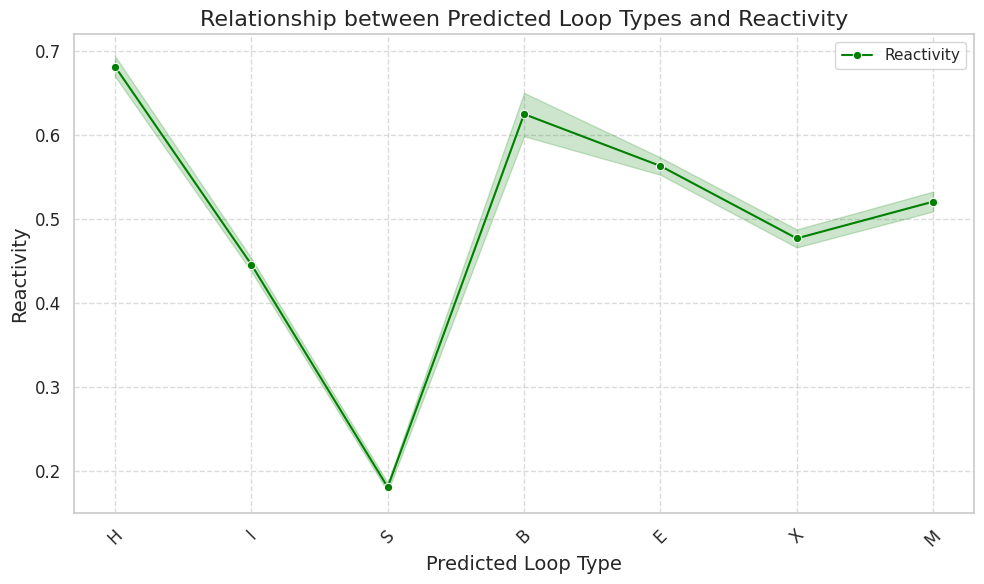

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Create a line plot with markers
sns.lineplot(data=train, x='predicted_loop_type', y='reactivity', marker='o', dashes=False, color='green', label='Reactivity')

plt.title('Relationship between Predicted Loop Types and Reactivity', fontsize=16)
plt.xlabel('Predicted Loop Type', fontsize=14)
plt.ylabel('Reactivity', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Relationship between predicted loop type and structure

<ipython-input-26-d179e8d78e19>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(train_loop_structure_pairs))


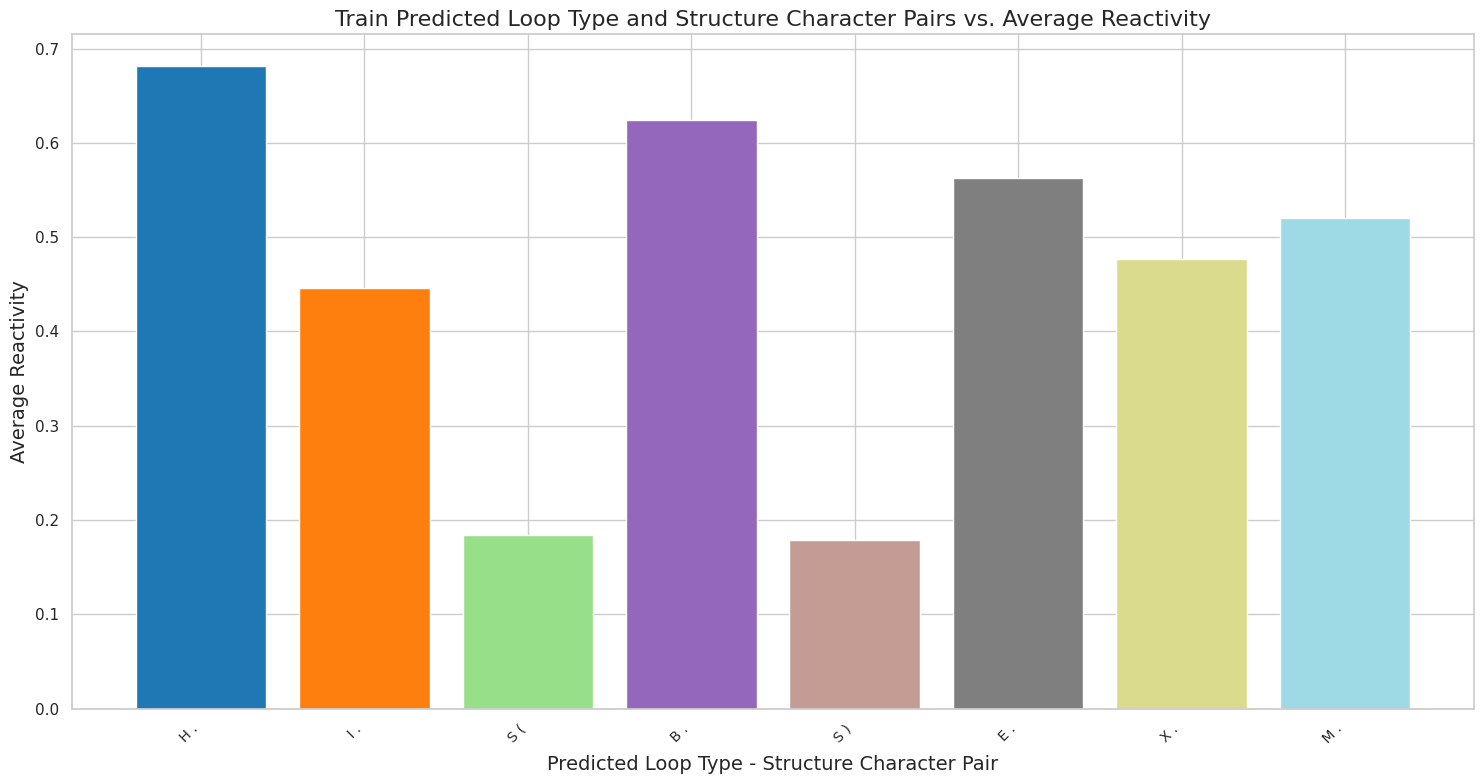

In [26]:
def get_paired_reactivity(*sequences, reactivity_values):
    output = Counter()
    for seq_chars, reactivity in zip(zip(*sequences), reactivity_values):
        new_token = ''
        for seq_char in seq_chars:
            new_token += ' ' + seq_char
        output[new_token] += reactivity

    return output

train_loop_structure_pairs = get_paired_tokens(train.predicted_loop_type, train.structure)
train_loop_structure_reactivity = get_paired_reactivity(train.predicted_loop_type, train.structure, reactivity_values=train.reactivity)

plt.figure(figsize=(15, 8))

# Customize color palette
color_palette = plt.cm.get_cmap('tab20', len(train_loop_structure_pairs))

# Create a bar plot for train dataset
plt.bar(train_loop_structure_pairs.keys(), [train_loop_structure_reactivity[pair] / train_loop_structure_pairs[pair] for pair in train_loop_structure_pairs], color=color_palette(range(len(train_loop_structure_pairs))))
plt.title('Train Predicted Loop Type and Structure Character Pairs vs. Average Reactivity', fontsize=16)
plt.xlabel('Predicted Loop Type - Structure Character Pair', fontsize=14)
plt.ylabel('Average Reactivity', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
